# Template Matching
in this section our goal is to find all specific template in an image based on a template that we have . i choose ncc(normalized cross_corrolation) to template matching . below we summarize the process Respectively :

1) reading both original and template image and convert them to grayscale form

2) for better matching i choose a proper portion of patch.png ( crop desired portion of it)

3) pass grayscale images to ncc function

4) ncc function gives each pixel a value that demonstrates likelihood of each pixels to belong to template image (giving us a score matrix!)

5) set threshold for our score matrix. this threshold pass all acceptable pixels and reject undesirable results

6) make pair of x and y coordinates of acceptable pixels (using zip function) and then sort them based on their y position

7) set condition that we can distinguish between two acceptable answers if distance between them is bigger than specific threshold!

we will say further how to implement each task specifically

## import required libraries

In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

## reading both original and template image and convert them to grayscale form



In [2]:
# read original and template image

image = cv2.imread("Greek-ship.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = np.array(gray_image)


template = cv2.imread("patch.png")
gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
gray_template = np.array(gray_template)

# specifing proper portion of patch.png as a template
gray_template = gray_template[80:350, 73:130]


## ncc function
`nnc(original_image, template_image)` give original and template image in grayscale form and give each pixel a score that show their likelihood to belong to the specific template .


In [3]:
def nnc(original_image: np.ndarray, template_image: np.ndarray):

    # down size original image by 1/4  and template image by 0.15
    for xx in range(0, 2):
        original_image = cv2.pyrDown(original_image)

    template_image = cv2.resize(template_image, (0, 0), fx=0.15, fy=0.15)

    # --------------------------------------------

    [x_t, y_t] = template_image.shape
    [x_i, y_i] = original_image.shape

    mean_template = np.mean(template_image)

    scores = np.zeros([x_i-x_t, y_i-y_t])

    # ----------------------------------------------

    for x in range(0, x_i-x_t):

        for y in range(0, y_i-y_t):

            original_patch = original_image[x:x+x_t, y:y+y_t]

            mean_original_patch = np.mean(original_patch)

            std_dev_image = np.sqrt(
                np.sum((original_patch-mean_original_patch)**2))

            std_dev_template = np.sqrt(
                np.sum((template_image-mean_template)**2))

            template_tilda: np.ndarray = (
                template_image-mean_template)/std_dev_template

            image_tilda: np.ndarray = (
                original_patch-mean_original_patch)/std_dev_image

            scores[x, y] = np.sum(np.multiply(template_tilda, image_tilda))

    return scores

# ------------------------------------

final = nnc(gray_image, gray_template)

## set threshold for  score matrix


In [4]:
position = np.where(final > 0.5)  # set threshold to 0.5
length = (len(position[1]))

## make pair of x and y coordinates of acceptable pixels and then sort them based on their y position
using two functions is necessary in this section :
1) `zip(arg1,arg2)` to merge and pair x and y coordinates of acceptable pixels
1) `list.sort()` to sort coordinates pair by lowest value  based on y position

In [5]:
x = zip(position[0][:], position[1][:])
a = list(x)
a.sort(key=lambda x: x[1])

## set condition to  distinguish between two acceptable answers and plot rectangular box for every answer


In [6]:
c1 = 0

for i in range(0, length):

    if(a[i][1]-c1 > 5):

        cv2.rectangle(image, (a[i][1]*4, a[i][0]*4),
                      (a[i][1]*4+30, a[i][0]*4+300), (0, 0, 255), 3)

        c1 = a[i][1]


# final result




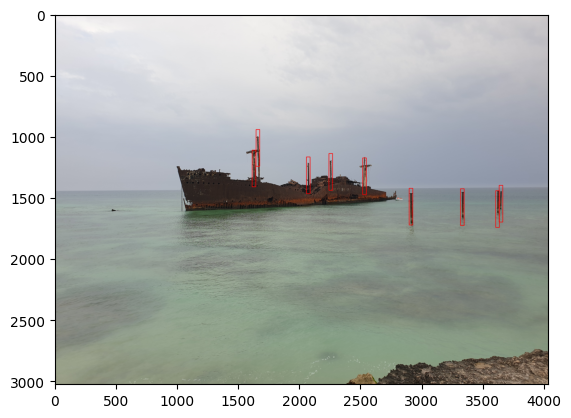

In [7]:
final_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imsave('res15.jpg', final_image)
plt.imshow(final_image)
plt.show()
